<a href="https://colab.research.google.com/github/eliasssantana/nayve_bayes_classification_python/blob/main/dados_desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>### Carregamento de dados

In [4]:
import pandas as pd
import random
import numpy as np

In [5]:
dados = pd.read_csv('credit_data.csv')

In [6]:
dados.shape

(2000, 5)

>### Tratamento de dados

In [7]:
dados.isna().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [8]:
dados.dropna(inplace=True)
dados.shape

(1997, 5)

In [9]:
import seaborn as sns

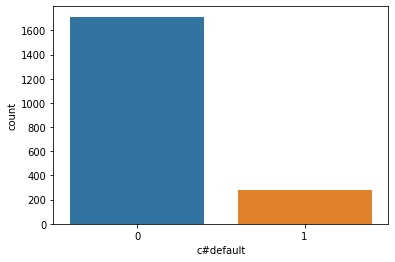

In [10]:
sns.countplot(x = dados['c#default']);

In [11]:
X = dados.iloc[:, 1:4].values

In [12]:
X.shape

(1997, 3)

In [13]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [14]:
y = dados.iloc[:, 4].values

In [15]:
y.shape

(1997,)

>### Base de treinamento e teste


---



In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify=y)

In [18]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [19]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [20]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [21]:
1714 / len(dados), 283 / len(dados)

(0.8582874311467201, 0.14171256885327993)

In [22]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [23]:
1371 / len(y_treinamento), 226 / len(y_treinamento)

(0.8584846587351284, 0.14151534126487164)

In [24]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [25]:
343 / len(y_teste), 57 / len(y_teste)

(0.8575, 0.1425)

> ### Classificação com Naïve Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

In [29]:
modelo = GaussianNB()

In [31]:
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [33]:
previsoes  = modelo.predict(X_teste)

In [35]:
previsoes

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [36]:
y_teste

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [39]:
from sklearn.metrics import accuracy_score

In [42]:
resultado = accuracy_score(previsoes, y_teste)

In [43]:
resultado

0.9425

In [45]:
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(previsoes, y_teste)

In [50]:
cm

array([[337,  17],
       [  6,  40]])

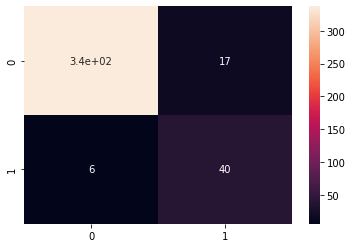

In [51]:
sns.heatmap(cm, annot=True)

In [52]:
(337 + 40) / (337 + 17 + 6 + 40)

0.9425

**Percentual de acerto sobre as pessoas que pagaram o empréstimo de fato**

In [55]:
337 / (337 + 17)

0.9519774011299436

**Percentual de acertos sobre as pessoas que não pagaram o empréstimo**

In [56]:
40 / (40 + 6)

0.8695652173913043

> ### Subamostragem (undersampling) - Tomek links

In [57]:
from imblearn.under_sampling import TomekLinks

In [70]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under= tl.fit_resample(X, y)

In [71]:
X_under, y_under 

(array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
        [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
        [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
        ...,
        [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
        [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
        [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]]),
 array([0, 0, 0, ..., 1, 0, 0]))

In [73]:
np.unique(y_under, return_counts=True), np.unique(y, return_counts=True)

((array([0, 1]), array([1614,  283])), (array([0, 1]), array([1714,  283])))

In [79]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)

In [80]:
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [81]:
modelo_u = GaussianNB()

In [83]:
modelo_u.fit(X_treinamento_u, y_treinamento_u)

GaussianNB()

In [85]:
previsoes_u = modelo_u.predict(X_teste_u)
previsoes_u

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [87]:
accuracy_score(previsoes_u, y_teste_u)

0.9289473684210526

In [89]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[315,  19],
       [  8,  38]])

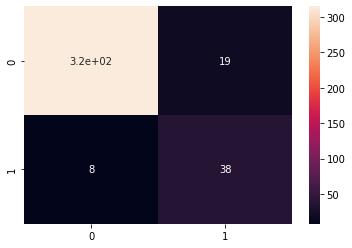

In [91]:
sns.heatmap(cm_u, annot=True)

In [92]:
315 / (315 + 19)

0.9431137724550899

In [93]:
38 / (38 + 8)

0.8260869565217391